<a href="https://colab.research.google.com/github/Benqui/Alcala-RE/blob/main/examenParcial02/10_modelos_Transferencia_de_aprendizaje_categorico_correciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

liga de mi data set: https://drive.google.com/drive/folders/10CAfHD-dAwbOIit0KDYFa22wLErHeKiu?usp=share_link

In [ ]:
#Importar el modelo de interes
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/dataset/train"
test_dir = "/content/drive/MyDrive/dataset/test"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")



print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 100 images belonging to 10 classes.
Testing images:
Found 100 images belonging to 10 classes.


In [ ]:
train_data

In [ ]:
imgs, labels = next(train_data)

In [ ]:
labels

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')     
    plt.tight_layout()
    plt.show()

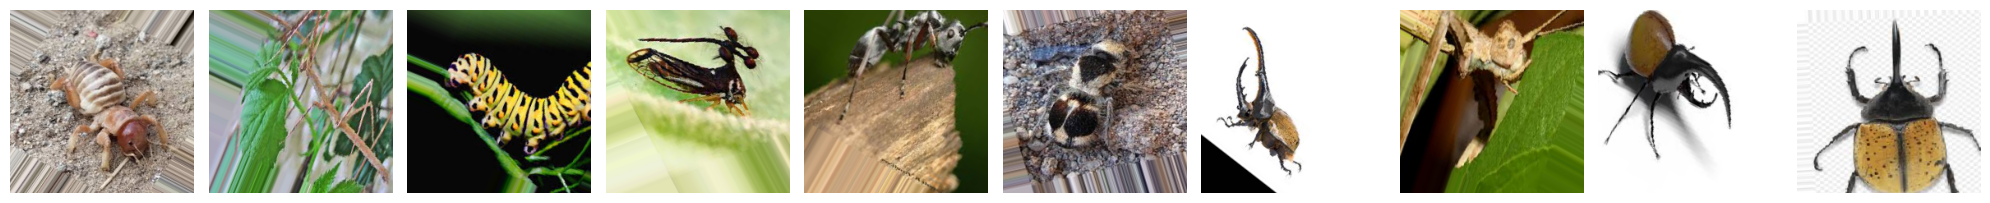

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ardilla 1=>luciernaga 2=>mariposa 3=>tecolote 4=>zorro

In [ ]:
# Al cargar un modelo dado, el argumento " include_top " se puede establecer en False, en cuyo caso las capas de salida
# totalmente conectadas (DENSE) del modelo utilizado para hacer predicciones no se cargarán, esto permite agregar y entrenar
# una nueva capa de salida.
pre_trained_model = VGG16(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

In [ ]:
# Se debe congelar el modelo base, es decir no se ajustarán los pesos del modelo base
pre_trained_model.trainable = False

In [ ]:
IMAGE_SIZE+(3,)

(224, 224, 3)

In [ ]:
pre_trained_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
pre_trained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

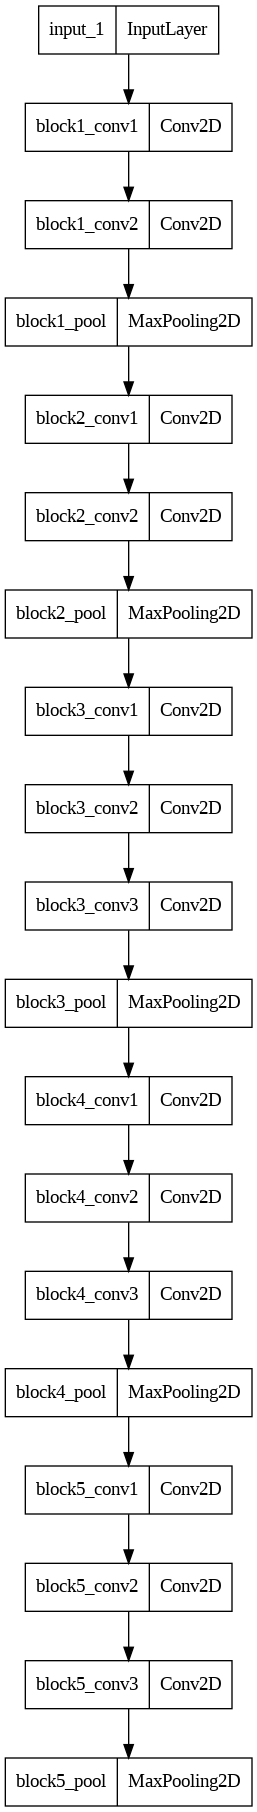

In [ ]:
from keras.utils import plot_model
# ver el modelo gráficamente
plot_model(pre_trained_model)

In [ ]:
# # Agregar nuevas capas utlizando la API funcional de KERAS 
# x = Flatten()(pre_trained_model.output)
# x = Dense(32, activation='relu')(x)
# #predicciones = Dense(10, activation='sigmoid')(x)
# predicciones = Dense(10, activation='softmax')(x)

# Agregar nuevas capas utlizando la API funcional de KERAS 
x = Flatten()(pre_trained_model.output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(16, activation='sigmoid')(x)
x = Dense(32, activation='relu')(x)
predicciones = Dense(10, activation='softmax')(x)

In [ ]:
# Crear modelo
modelo = Model(inputs=pre_trained_model.input, outputs=predicciones)
modelo.summary()

In [ ]:
# Compilar modelo
#modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Entrenar modelo
history =modelo.fit(train_data, validation_data=test_data, epochs=100, batch_size=300)

Epoch 1/100
4/4 [==============================] - 43s 812ms/step - loss: 4.9258 - accuracy: 0.0800 - val_loss: 4.0043 - val_accuracy: 0.0700
Epoch 2/100
4/4 [==============================] - 2s 491ms/step - loss: 3.2279 - accuracy: 0.0700 - val_loss: 2.4309 - val_accuracy: 0.1100
Epoch 3/100
4/4 [==============================] - 2s 635ms/step - loss: 2.4806 - accuracy: 0.1300 - val_loss: 1.9426 - val_accuracy: 0.3700
Epoch 4/100
4/4 [==============================] - 2s 481ms/step - loss: 1.9767 - accuracy: 0.3000 - val_loss: 2.2460 - val_accuracy: 0.1700
Epoch 5/100
4/4 [==============================] - 2s 495ms/step - loss: 2.2296 - accuracy: 0.1700 - val_loss: 1.8461 - val_accuracy: 0.4000
Epoch 6/100
4/4 [==============================] - 2s 541ms/step - loss: 2.0383 - accuracy: 0.2700 - val_loss: 1.6425 - val_accuracy: 0.4400
Epoch 7/100
4/4 [==============================] - 3s 811ms/step - loss: 1.8828 - accuracy: 0.3200 - val_loss: 1.6131 - val_accuracy: 0.5000
Epoch 8/100


In [ ]:
# Guardar el modelo en formato HDF5 
modelo.save('./dataset/model_da1.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
#img_path = '/content/drive/MyDrive/Escuela/ia/dataset/test/Membrácido-brasileño/Membrácido-brasileño20.jpeg'
img_path = '/content/drive/MyDrive/dataset/test/escarabajo-hercules/escarabajo-hercules10.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/cara-niño/cara-niño 15.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/gorgojo-jirafa/gorgojo-jirafa 18.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/hormiga-panda/hormiga-panda 18.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/insecto-palo/insecto-palo 18.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/luciernaga/luciernaga 11.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/mantis-flor/mantis-flor 19.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/mariposa-atlas/mariposa-atlas 12.jpeg'
#img_path = '/content/drive/MyDrive/dataset/test/oruga/oruga11.jpeg'


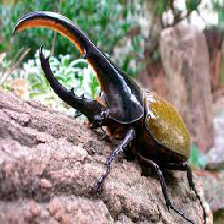

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img

In [ ]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
preds = modelo.predict(X)

1/1 [==============================] - 1s 723ms/step


In [ ]:
preds.shape

(1, 10)

In [ ]:
preds

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# np.rint(preds)
np.argmax(preds, axis=1)

array([2])

In [ ]:
imgs, labels = next(test_data)

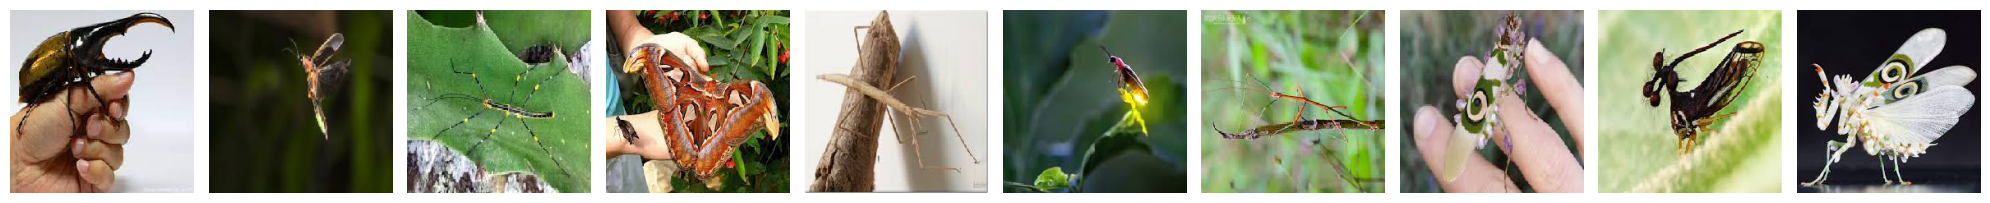

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0.

In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ardilla 1=>luciernaga 2=>mariposa 3=>tecolote 4=>zorro

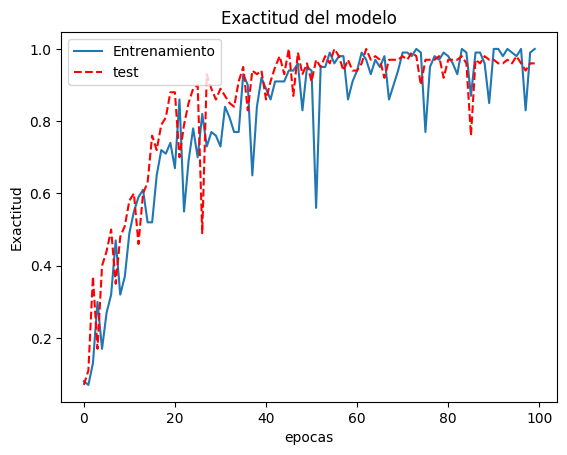

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

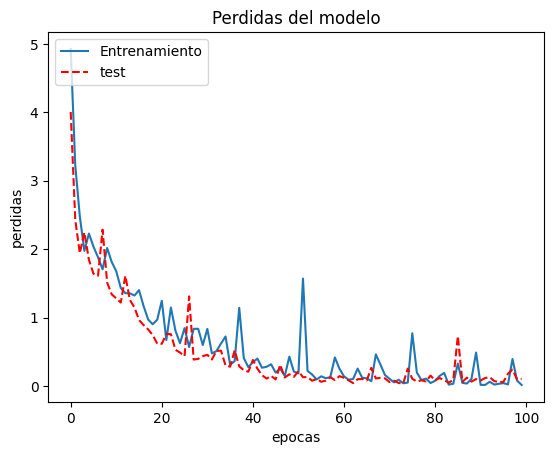

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()